In [13]:
import torch
import numpy as np
from torch.utils.data import DataLoader, Dataset, DistributedSampler
from torch import Tensor
import h5py


def worker_init(wrk_id):
    np.random.seed(torch.utils.data.get_worker_info().seed%(2**32 - 1))


def get_data_loader_distributed():
    fname = 'rbcTrainingData.h5'#params.data_path
    with h5py.File(fname, 'r') as f:
        Fields = f['input_data']['fields'][:,:,:,:].astype(np.float32)
        Residuals = f['target_data']['residual_tensor'][:,:,:,:].astype(np.float32)
    
    Fields = np.moveaxis(Fields, -1, 1)
    Residuals = np.moveaxis(Residuals, -1, 1)
    
    
    
    
    dataset = GetDataset(Fields, Residuals)

    train_loader = DataLoader(dataset,
                              batch_size= 1, 
                              num_workers=1,
                              worker_init_fn=worker_init,
                              pin_memory=torch.cuda.is_available())
    return train_loader



class GetDataset(Dataset):
    """Random crops"""
    def __init__(self, Fields, Residuals):
        self.Fields = Fields
        self.Residuals = Residuals
        self.length = Residuals.shape[0]
        self.size = 128 #params.data_size
        self.Nsamples = Residuals.shape[0]
        self.rescale = Rescaler()

    def __len__(self):
        return self.Nsamples

    def __getitem__(self, idx):
        inp = self.Fields[idx,:,:,:]
        tar = self.Residuals[idx,:,:,:]
        inp = np.swapaxes(inp, -1,1)
        tar = np.swapaxes(tar, -1,1)
        return torch.as_tensor(inp), torch.as_tensor(tar)



In [11]:
train_loader = get_data_loader_distributed()

In [28]:
fname = 'rbcTrainingData.h5'#params.data_path
with h5py.File(fname, 'r') as f:
    Fields = f['input_data']['fields'][:,:,:,:].astype(np.float32)
    Residuals = f['target_data']['residual_tensor'][:,:,:,:].astype(np.float32)


In [29]:
Fields = np.moveaxis(Fields, -1, 1)

In [30]:
Fields.shape

(2544, 4, 128, 64)

In [31]:
Residuals.shape

(2544, 128, 64, 5)

In [32]:
Residuals = np.moveaxis(Residuals, -1, 1)

In [33]:
Residuals.shape

(2544, 5, 128, 64)

In [20]:
import matplotlib.pyplot as plt

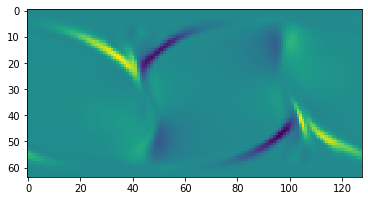

In [27]:
plt.imshow(Residuals[1002,2,:,:])